import libraries

In [1]:
import pandas as pd
import numpy as np

import project functions

### GPS data

In [4]:
gps = pd.read_parquet('../data output/7 gps_density_month_day_hour_for_random_forest.parquet.gzip')

In [5]:
# select the hex size to work
APERTURE_SIZE = 9
hex_col = 'hex' + str(APERTURE_SIZE)

### hash

In [6]:
# gps = pd.read_csv('/home/lefteris/Desktop/trajectories/data/7_gps_events_in_london_geohash_list.csv')

In [7]:
# HASH_SIZE = 7 #geohash length
# hash_col = 'hash' + str(HASH_SIZE)

In [8]:
# GeoIndex column
gi_col = hex_col

In [9]:
gps.columns

Index(['hex9', 'time_cat', 'day_cat', 'month', 'gps_cnt', 'country',
       'hex9_lat', 'hex9_lon', 'num_minutes', 'year', 'weekend', 'time_num',
       'time_cos', 'time_sin', 'day_sin', 'day_num', 'day_cos'],
      dtype='object')

### add extra features to gps df

In [9]:
poi_density = pd.read_csv('../data output/1 london_boundary_hex9_total_digi_cnt.csv')

In [10]:
diversity = pd.read_csv('../data output/4 london_boundary_hex9_diversity.csv') #,usecols = ['']

In [11]:
census = pd.read_csv('../data output/5 london_boundary_hex9_census.csv',usecols = [hex_col,'Population density km'])

In [12]:
gps = gps.merge(poi_density, how='inner', on=hex_col).\
        merge(diversity, how='inner', on=hex_col).\
        merge(census, how='inner', on=hex_col).\
        rename(columns={'total_cnt':'poi_cnt'})

In [8]:
gps.columns

Index(['timestamp', 'latitude', 'longitude', 'deviceId', 'country',
       'startTimestamp', 'endTimestamp', 'hex9', 'hex9_lat', 'hex9_lon',
       'date', 'num_minutes', 'day_cat', 'month', 'year', 'weekend',
       'time_cat', 'time_num', 'time_cos', 'time_sin', 'day_num', 'day_cos',
       'day_sin', 'gps_cnt'],
      dtype='object')

### Encoding categorical variables

“high-cardinality attributes” / curse of dimensionality

In [10]:
gps_hot = gps.copy()

In [11]:
gps_hot = gps_hot[[ #'day_cat','time_cat', # 'country', 'month',
                   'weekend',# 'year'
                   'hex9_lat', 'hex9_lon',#'num_minutes', 
                   'time_num', 'time_cos', 'time_sin', 'day_num','day_cos',
                   'day_sin', 'gps_cnt']] # , 'poi_cnt', 'shannon', 'Population density km'

In [12]:
gps_hot.sample(10)

,weekend,hex9_lat,hex9_lon,time_num,time_cos,time_sin,day_num,day_cos,day_sin,gps_cnt
191181,0,51.511018,0.001836,0.385417,-0.751840,0.659346,0.483631,-0.994716,0.102669,4
662086,0,51.509928,-0.137903,0.843750,0.555570,-0.831470,0.263393,-0.084051,0.996461,19
65764,1,51.452046,-0.128205,0.135417,0.659346,0.751840,0.733631,-0.102669,-0.994716,1
829435,0,51.516181,-0.174495,0.177083,0.442289,0.896873,0.596726,-0.820936,-0.571021,3
577480,0,51.531786,0.171514,0.885417,0.751840,-0.659346,0.555060,-0.940754,-0.339090,2
201733,0,51.509966,-0.079551,0.010417,0.997859,0.065403,0.572917,-0.896873,-0.442289,3
319768,1,51.521689,-0.112801,0.260417,-0.065403,0.997859,0.751488,0.009350,-0.999956,14
966996,0,51.515621,-0.354425,0.677083,-0.442289,-0.896873,0.382440,-0.739379,0.673289,1
925143,0,51.551919,-0.260592,0.843750,0.555570,-0.831470,0.691964,-0.356622,-0.934249,1
75367,0,51.496931,-0.132340,0.718750,-0.195090,-0.980785,0.674107,-0.458982,-0.888446,1


In [13]:
# gps_hot['day_cat'].value_counts()

### cast astype('category') 

In [35]:
gps_hot['country'] = gps_hot['country'].astype('category')

Label Encoding

In [38]:
gps_hot['country'] = gps_hot['country'].cat.codes

In [39]:
gps_hot.head()

,country,month,day_cat,time_cat,weekend,hex9_lat,hex9_lon,num_minutes,time_num,time_cos,time_sin,day_num,day_cos,day_sin,gps_cnt,poi_cnt,shannon,Population density km
0,40,4,Tuesday,15:00,0,51.492485,-0.170928,900,0.635417,-0.659346,-0.75184,0.233631,0.102669,0.994716,6,38,10.527387,8800.0
1,27,4,Tuesday,15:00,0,51.492485,-0.170928,900,0.635417,-0.659346,-0.75184,0.233631,0.102669,0.994716,6,38,10.527387,8800.0
2,40,4,Tuesday,15:00,0,51.492485,-0.170928,900,0.635417,-0.659346,-0.75184,0.233631,0.102669,0.994716,6,38,10.527387,8800.0
3,21,4,Tuesday,15:00,0,51.492485,-0.170928,900,0.635417,-0.659346,-0.75184,0.233631,0.102669,0.994716,6,38,10.527387,8800.0
4,27,4,Tuesday,15:00,0,51.492485,-0.170928,900,0.635417,-0.659346,-0.75184,0.233631,0.102669,0.994716,6,38,10.527387,8800.0


In [63]:
# One-hot encode the data using pandas get_dummies
gps_hot = pd.concat([gps_hot, pd.get_dummies(gps[['day_cat']])], axis=1).drop(['day_cat'], axis=1)

In [64]:
# One-hot encode the data using pandas get_dummies
gps_hot = pd.concat([gps_hot, pd.get_dummies(gps[['month']])], axis=1).drop(['month'], axis=1)

In [65]:
# One-hot encode the data using pandas get_dummies
gps_hot = pd.concat([gps_hot, pd.get_dummies(gps[['time_cat']])], axis=1).drop(['time_cat'], axis=1)

In [20]:
# # One-hot encode the data using pandas get_dummies
# gps_hot = pd.concat([gps_hot, pd.get_dummies(gps[['country']])], axis=1).drop(['country'], axis=1)

In [66]:
gps_hot.head(1)

,weekend,hex9_lat,hex9_lon,num_minutes,time_num,time_cos,time_sin,day_num,day_cos,day_sin,...,time_cat_22:00,time_cat_23:00,time_cat_2:00,time_cat_3:00,time_cat_4:00,time_cat_5:00,time_cat_6:00,time_cat_7:00,time_cat_8:00,time_cat_9:00
0,0,51.492485,-0.170928,900,0.635417,-0.659346,-0.75184,0.233631,0.102669,0.994716,...,0,0,0,0,0,0,0,0,0,0


In [46]:
list(gps_hot.columns)

['country',
 'weekend',
 'hex9_lat',
 'hex9_lon',
 'num_minutes',
 'time_num',
 'time_cos',
 'time_sin',
 'day_num',
 'day_cos',
 'day_sin',
 'gps_cnt',
 'poi_cnt',
 'shannon',
 'Population density km',
 'day_cat_Friday',
 'day_cat_Monday',
 'day_cat_Saturday',
 'day_cat_Sunday',
 'day_cat_Thursday',
 'day_cat_Tuesday',
 'day_cat_Wednesday',
 'time_cat_00:00',
 'time_cat_10:00',
 'time_cat_11:00',
 'time_cat_12:00',
 'time_cat_13:00',
 'time_cat_14:00',
 'time_cat_15:00',
 'time_cat_16:00',
 'time_cat_17:00',
 'time_cat_18:00',
 'time_cat_19:00',
 'time_cat_1:00',
 'time_cat_20:00',
 'time_cat_21:00',
 'time_cat_22:00',
 'time_cat_23:00',
 'time_cat_2:00',
 'time_cat_3:00',
 'time_cat_4:00',
 'time_cat_5:00',
 'time_cat_6:00',
 'time_cat_7:00',
 'time_cat_8:00',
 'time_cat_9:00']

In [48]:
gps_hot.dtypes

country                     int8
weekend                    int64
hex9_lat                 float64
hex9_lon                 float64
num_minutes                int64
time_num                 float64
time_cos                 float64
time_sin                 float64
day_num                  float64
day_cos                  float64
day_sin                  float64
gps_cnt                    int64
poi_cnt                    int64
shannon                  float64
Population density km    float64
day_cat_Friday             uint8
day_cat_Monday             uint8
day_cat_Saturday           uint8
day_cat_Sunday             uint8
day_cat_Thursday           uint8
day_cat_Tuesday            uint8
day_cat_Wednesday          uint8
time_cat_00:00             uint8
time_cat_10:00             uint8
time_cat_11:00             uint8
time_cat_12:00             uint8
time_cat_13:00             uint8
time_cat_14:00             uint8
time_cat_15:00             uint8
time_cat_16:00             uint8
time_cat_1

### 1st option 

In [15]:
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [67]:
# Labels are the values we want to predict
labels = np.array(gps_hot['gps_cnt'])

# Remove the labels from the features
# axis 1 refers to the columns
gps_hot= gps_hot.drop('gps_cnt', axis = 1)

# Saving feature names for later use
gps_list = list(gps_hot.columns)

# Convert to numpy array
gps_array = np.array(gps_hot)

In [68]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels =\
    train_test_split(gps_array, labels, test_size = 0.20) # , random_state = 42

In [69]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (786649, 44)
Training Labels Shape: (786649,)
Testing Features Shape: (196663, 44)
Testing Labels Shape: (196663,)


In [18]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()  
# train_features = sc.fit_transform(train_features)  
# test_features = sc.transform(test_features) 

In [70]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, n_jobs=-1) # , random_state = 42
# Train the model on training data
rf.fit(train_features, train_labels);

In [71]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'gps events')

Mean Absolute Error: 0.34 gps events


In [72]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 73.92 %.


In [73]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(gps_array, round(importance, 2)) for gps_array, importance in zip(gps_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances if pair[1]>0.015]

Variable: poi_cnt              Importance: 0.27
Variable: hex9_lon             Importance: 0.15
Variable: Population density km Importance: 0.13
Variable: hex9_lat             Importance: 0.09
Variable: shannon              Importance: 0.08
Variable: day_sin              Importance: 0.05
Variable: day_num              Importance: 0.04
Variable: day_cos              Importance: 0.04
Variable: time_sin             Importance: 0.03
Variable: num_minutes          Importance: 0.02
Variable: time_num             Importance: 0.02
Variable: time_cos             Importance: 0.02


[None, None, None, None, None, None, None, None, None, None, None, None]

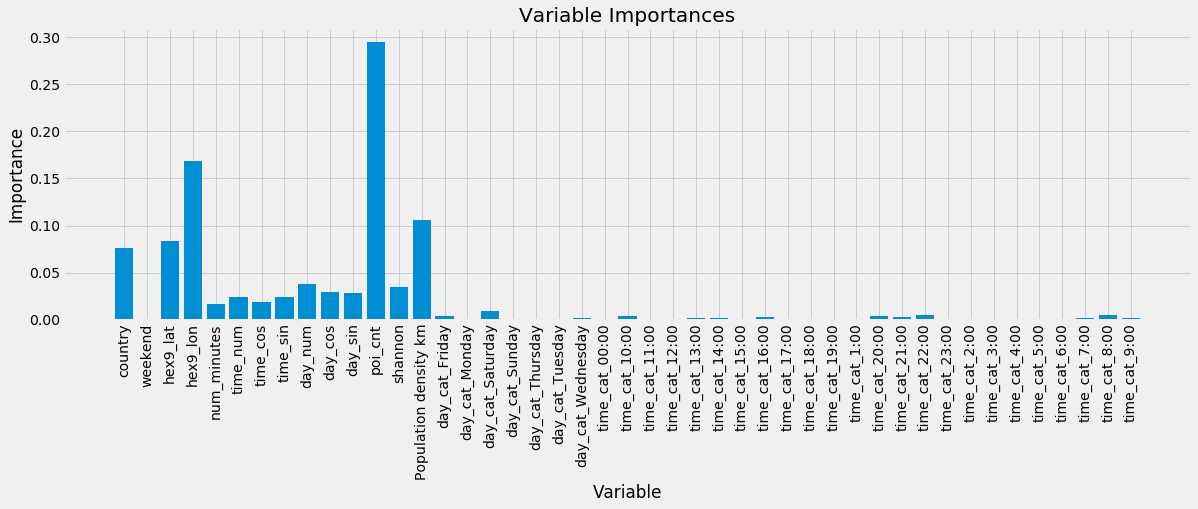

In [57]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# set the size of figure
f, ax = plt.subplots(figsize=(18,5))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, gps_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### 2nd option

In [11]:
#https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

In [56]:
gps_hot.head()

,weekend,hex9_lat,hex9_lon,time_num,time_cos,time_sin,day_num,day_cos,day_sin,gps_cnt
0,0,51.492485,-0.170928,0.635417,-0.659346,-0.75184,0.233631,0.102669,0.994716,6
1,0,51.492485,-0.170928,0.635417,-0.659346,-0.75184,0.233631,0.102669,0.994716,6
2,0,51.492485,-0.170928,0.635417,-0.659346,-0.75184,0.233631,0.102669,0.994716,6
3,0,51.492485,-0.170928,0.635417,-0.659346,-0.75184,0.233631,0.102669,0.994716,6
4,0,51.492485,-0.170928,0.635417,-0.659346,-0.75184,0.233631,0.102669,0.994716,6


In [54]:
X = gps_hot.iloc[:, 0:9].values  
y = gps_hot.iloc[:, 9].values 

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [52]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (786649, 9)
Training Labels Shape: (786649,)
Testing Features Shape: (196663, 9)
Testing Labels Shape: (196663,)


we could do scale our features but Random Forest does not care too much about this

In [46]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()  
# X_trainn = sc.fit_transform(X_train)  
# X_testt = sc.transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1)  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test) 

In [48]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.3115992840544485
Mean Squared Error: 2.455936085079552
Root Mean Squared Error: 1.5671426498821197


#### Important features 

In [49]:
# What are the most important features?
import operator
dict_feat_imp = dict(zip(list(gps_hot.columns.values),regressor.feature_importances_))

sorted_features = sorted(dict_feat_imp.items(), key=operator.itemgetter(1), reverse=True)
sorted_features

[('hex9_lon', 0.4646774523152722),
 ('hex9_lat', 0.259593568273508),
 ('day_sin', 0.06638317007376617),
 ('day_num', 0.05460044570445136),
 ('day_cos', 0.05230591867888348),
 ('time_num', 0.04387694789954955),
 ('time_sin', 0.034135636287034955),
 ('time_cos', 0.022930141136565833),
 ('weekend', 0.001496719630968259)]

In [41]:
pd.DataFrame(y_pred,y_test).head(20)

,0
12,12.00
9,9.00
8,8.00
7,7.00
25,25.00
6,6.26
16,16.00
34,34.00
3,2.78
2,2.05


## Another option 

In [13]:
# Configure libraries

%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import random

In [14]:
# Funtion for cross-validation over a grid of parameters

def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None, verbose=0):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func, verbose=verbose)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds, verbose=verbose)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_, gs.cv_results_, gs.scorer_)
    print("Best score: ", gs.best_score_)
    best = gs.best_estimator_
    return best

### Define train and test tests

In [15]:
gps_hot.columns

Index(['weekend', 'hex9_lat', 'hex9_lon', 'time_num', 'time_cos', 'time_sin', 'day_num', 'day_cos', 'day_sin', 'gps_cnt'], dtype='object')

In [16]:
gps_hot.shape

(395999, 10)

In [17]:
itrain, itest = train_test_split(range(gps_hot.shape[0]), train_size=0.8)
mask=np.ones(gps_hot.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)
mask[:10]

/home/lefteris/anaconda3/envs/geoindex/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


array([ True,  True,  True,  True, False, False, False,  True,  True,
        True])

### Final preperation for machine learning

In [18]:
list(gps_hot.columns)[:-1]

['weekend',
 'hex9_lat',
 'hex9_lon',
 'time_num',
 'time_cos',
 'time_sin',
 'day_num',
 'day_cos',
 'day_sin']

In [19]:
# Split off the features
#Xnames = ["day_num", "day_cos", "day_sin", "weekend","time_num", "time_cos", "time_sin", "{}_lat".format(gi_col), "{}_lon".format(gi_col)]
X = gps_hot[list(gps_hot.columns)[:-1]]

# Split off the target (which will be the logarithm of the number of cnts (+1))
y =np.log10(gps_hot['gps_cnt']+1) #gps['cnt']

### Get the train and test tests 

In [20]:
Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
n_samples = Xtrain.shape[0]
n_features = Xtrain.shape[1]
print(Xtrain.shape)
max_samples = 1000000

if Xtrain.shape[0] > max_samples:
    rows = random.sample(list(Xtrain.index), max_samples)
    Xtrain = Xtrain.ix[rows]
    ytrain = ytrain.ix[rows]
print(Xtrain.shape)

Xtrain.head()

(316799, 9)
(316799, 9)


,weekend,hex9_lat,hex9_lon,time_num,time_cos,time_sin,day_num,day_cos,day_sin
0,0,51.324624,-0.129289,0.510417,-0.997859,-0.065403,0.644345,-0.616153,-0.787627
1,0,51.324624,-0.129289,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289
2,1,51.324624,-0.129289,0.593750,-0.831470,-0.555570,0.941964,0.934249,-0.356622
3,0,51.324624,-0.129289,0.677083,-0.442289,-0.896873,0.239583,0.065403,0.997859
7,1,51.324624,-0.129289,0.302083,-0.321439,0.946930,0.757440,0.046733,-0.998907


In [21]:
# Labels are the values we want to predict
labels = np.array(gps_hot['gps_cnt'])

# Remove the labels from the features
# axis 1 refers to the columns
gps_hot= gps_hot.drop('gps_cnt', axis = 1)

# Saving feature names for later use
gps_list = list(gps_hot.columns)

# Convert to numpy array
gps_array = np.array(gps_hot)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest =\
    train_test_split(gps_array, labels, test_size = 0.20) # , random_state = 42

print('Training Features Shape:', Xtrain.shape)
print('Training Labels Shape:', ytrain.shape)
print('Testing Features Shape:', Xtest.shape)
print('Testing Labels Shape:', ytest.shape)

Training Features Shape: (316799, 9)
Training Labels Shape: (316799,)
Testing Features Shape: (79200, 9)
Testing Labels Shape: (79200,)


### Random forest regression 

In [23]:
# Create a Random Forest Regression estimator
estimator = RandomForestRegressor(n_estimators=20, n_jobs=-1)

In [24]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [25]:
# Define a grid of parameters over which to optimize the random forest
# We will figure out which number of trees is optimal
parameters = {"n_estimators": [50],
              "max_features": ["auto"], # ["auto","sqrt","log2"]
              "max_depth": [50]}

best = cv_optimize(estimator, parameters, Xtrain, ytrain, n_folds=5, score_func=ftwo_scorer, verbose=3)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-12.011582312184343, total=  17.2s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.8s remaining:    0.0s


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-10.747079901995855, total=  16.3s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   36.7s remaining:    0.0s


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-10.003606382575757, total=  16.3s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................
[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-13.941347225028057, total=  19.8s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................
[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-11.194183733960447, total=  17.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished


BEST {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 50} -11.579561127617938 {'mean_fit_time': array([17.02506557]), 'std_fit_time': array([1.29426435]), 'mean_score_time': array([0.40444026]), 'std_score_time': array([0.00091369]), 'param_max_depth': masked_array(data=[50],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=['auto'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[50],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 50, 'max_features': 'auto', 'n_estimators': 50}], 'split0_test_score': array([-12.01158231]), 'split1_test_score': array([-10.7470799]), 'split2_test_score': array([-10.00360638]), 'split3_test_score': array([-13.94134723]), 'split4_test_score': array([-11.19418373]), 'mean_test_score': array([-11.57956113]), 'std_test_score': array([1.34832313]), 'rank_test_s

In [26]:
# Fit the best Random Forest and calculate R^2 values for training and test sets
reg=best.fit(Xtrain, ytrain)
training_accuracy = reg.score(Xtrain, ytrain)
test_accuracy = reg.score(Xtest, ytest)
print("############# based on standard predict ################")
print("R^2 on training data: %0.4f" % (training_accuracy))
print("R^2 on test data:     %0.4f" % (test_accuracy))

############# based on standard predict ################
R^2 on training data: 0.9959
R^2 on test data:     0.9747


In [29]:
# Show some of the predictions vs. the real number of pickups
# predictions vs. real number of pickups

#log space
# np.round(np.power(10,np.column_stack((reg.predict(Xtest),ytest))) - 1,decimals=0).astype(int)

np.round(np.column_stack((reg.predict(Xtest),ytest))- 1,decimals=0).astype(int)

array([[ 0,  0],
       [ 4,  3],
       [ 1,  0],
       ...,
       [81, 81],
       [ 3,  3],
       [ 1,  0]])

In [30]:
# Calculate the Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(reg.predict(Xtest),ytest))
# print("RMSE = %0.3f" % rmse)

# log space
print("RMSE = %0.3f (this is in log-space!)" % rmse)
# print("So two thirds of the records would be a factor of less than %0.2f away from the real value." % np.power(10,rmse))

print("So two thirds of the records would be a factor of less than %0.3f away from the real value." % rmse)

RMSE = 2.981 (this is in log-space!)
So two thirds of the records would be a factor of less than 2.981 away from the real value.


In [31]:
# What are the most important features?
import operator
dict_feat_imp = dict(zip(list(gps_hot.columns),reg.feature_importances_))

sorted_features = sorted(dict_feat_imp.items(), key=operator.itemgetter(1), reverse=True)
sorted_features

[('hex9_lat', 0.3570175845037059),
 ('hex9_lon', 0.33745638127451827),
 ('day_sin', 0.05702556811668145),
 ('time_sin', 0.05411370554468081),
 ('day_cos', 0.05322521822838316),
 ('time_num', 0.05000668248870647),
 ('day_num', 0.04777045484944099),
 ('time_cos', 0.04127818380262654),
 ('weekend', 0.0021062211912562484)]

In [32]:
# Construct dataframes with all possible times (time_data) and all possible locations (loc_data)
X = gps_hot.copy()

# Columns about time
time_cols = list(X.columns.values)
time_cols.remove("{}_lat".format(gi_col))
time_cols.remove("{}_lon".format(gi_col))

# Columns about location
loc_cols = ["{}_lat".format(gi_col),"{}_lon".format(gi_col)]

# Unique times
time_data = X.drop(loc_cols, axis=1).drop_duplicates()

# # # We are only going to look at Monday
time_data = time_data[time_data['day_num'] <= 1/7.]

# Unique locations
loc_data = X.drop(time_cols, axis=1).drop_duplicates()

# To reduce memory consumption, we are only predicting for
# the region closely around UCL
# 51.514138,-0.151663,51.532775,-0.118189
loc_data = loc_data[(loc_data["{}_lat".format(gi_col)] > 51.514138) & (loc_data["{}_lat".format(gi_col)] < 51.532775) &
                    (loc_data["{}_lon".format(gi_col)] > -0.151663) & (loc_data["{}_lon".format(gi_col)] < -0.118189)]

In [33]:
len(loc_data)

51

In [44]:
# Dummy column to be able to join them together
time_data['key'] = 1
loc_data['key'] = 1

# Merge the time_data and location_data
result = pd.merge(time_data, loc_data, on='key').drop(['key'], axis=1)
# result = result[Xtrain.columns.values]

In [45]:
result.head()

,weekend,time_num,time_cos,time_sin,day_num,day_cos,day_sin,hex9_lat,hex9_lon
0,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.516023,-0.120735
1,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.515810,-0.125353
2,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.518750,-0.119077
3,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.525224,-0.151048
4,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.522710,-0.148087


In [46]:
# Get the real number of pickups and take care that we can merge it with the predictions,
# by also taking the geohash and the timestamp
yy = gps[["{}_lat".format(gi_col), "{}_lon".format(gi_col), gi_col,'time_num','day_num','gps_cnt']] # 'day_num'

In [47]:
yy.head()

,hex9_lat,hex9_lon,hex9,time_num,day_num,gps_cnt
0,51.324624,-0.129289,89194ac0003ffff,0.510417,0.644345,1
1,51.324624,-0.129289,89194ac0003ffff,0.510417,0.072917,1
2,51.324624,-0.129289,89194ac0003ffff,0.593750,0.941964,1
3,51.324624,-0.129289,89194ac0003ffff,0.677083,0.239583,1
4,51.324624,-0.129289,89194ac0003ffff,0.760417,0.108631,1


In [48]:
# Do predictions and convert the logarithm to the normal numbers
# log space
result['pred_cnt'] = np.power(10,reg.predict(result)) - 1

# result['pred_cnt'] = reg.predict(result)

In [49]:
len(yy)

395999

In [50]:
# Merge the predictions and the real cnt
result = pd.merge(result, yy, how='left', on=['day_num','time_num', "{}_lat".format(gi_col), "{}_lon".format(gi_col)])#.drop([gi_col], axis=1)

In [51]:
result[~result.gps_cnt.isnull()]

,weekend,time_num,time_cos,time_sin,day_num,day_cos,day_sin,hex9_lat,hex9_lon,pred_cnt,hex9,gps_cnt
0,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.516023,-0.120735,103.712855,89194ad3253ffff,66.0
1,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.516023,-0.120735,103.712855,89194ad3253ffff,66.0
2,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.516023,-0.120735,103.712855,89194ad3253ffff,66.0
3,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.516023,-0.120735,103.712855,89194ad3253ffff,66.0
4,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.516023,-0.120735,103.712855,89194ad3253ffff,66.0
5,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.516023,-0.120735,103.712855,89194ad3253ffff,66.0
6,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.516023,-0.120735,103.712855,89194ad3253ffff,66.0
7,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.516023,-0.120735,103.712855,89194ad3253ffff,66.0
8,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.516023,-0.120735,103.712855,89194ad3253ffff,66.0
9,0,0.510417,-0.997859,-0.065403,0.072917,0.896873,0.442289,51.516023,-0.120735,103.712855,89194ad3253ffff,66.0


In [56]:
len(result[['pred_cnt', 'gps_cnt']][abs(result.pred_cnt-result.gps_cnt)<3])

8583589

In [57]:
len(result[['pred_cnt', 'gps_cnt']][abs(result.pred_cnt-result.gps_cnt)>3])

14249

In [58]:
len(result[['pred_cnt', 'gps_cnt']][abs(result.pred_cnt-result.gps_cnt)>5])

4274

In [59]:
len(result[['pred_cnt', 'gps_cnt']][abs(result.pred_cnt-result.gps_cnt)>10])

418